<a href="https://colab.research.google.com/github/smiley2911/UMAV-DataScience-intern/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [27]:
dataset = pd.read_csv('/Greendes.csv')
data =  dataset
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### EDA

In [28]:
#no.of rows and columns
print(data.shape)

(1470, 35)


In [29]:
#information of datset

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [30]:
#columns names
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [31]:
#Let’s have a look at whether this dataset contains any missing values or not
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

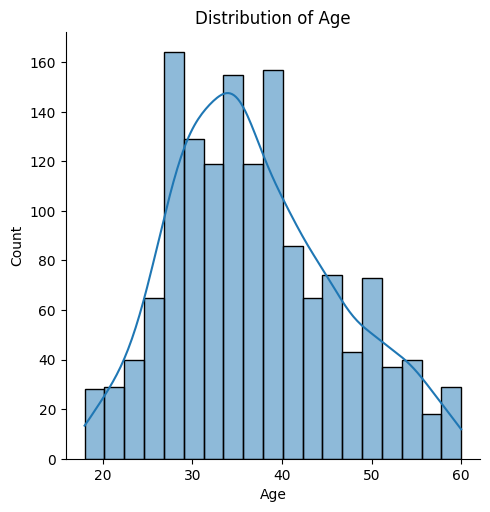

In [32]:
#the distribution of the age in the dataset:
sns.displot(data['Age'],kde = True)
plt.title('Distribution of Age')
plt.show()

In [33]:
#Calculate the attrition rate

attrition_count = dataset['Attrition'].value_counts()
print(attrition_count)
attrition_rate = (attrition_count['Yes'] / dataset.shape[0]) * 100
print('\n')
print("Attrition Rate: {:.2f}%".format(attrition_rate))


Attrition
No     1233
Yes     237
Name: count, dtype: int64


Attrition Rate: 16.12%


In [34]:
#the percentage of attrition by department:
# Filter the data to show only "Yes" values in the "Attrition" column
attrition_data = data[data['Attrition'] == 'Yes']

# Calculate the count of attrition by department
attrition_by_dept = attrition_data.groupby(['Department']).size().reset_index(name='Count')

print(attrition_by_dept)

               Department  Count
0         Human Resources     12
1  Research & Development    133
2                   Sales     92


In [35]:
# Create a donut chart
fig = go.Figure(data=[go.Pie(
                        labels=attrition_by_dept['Department'],
                        values=attrition_by_dept['Count'],
                            hole=0.6,
                        marker=dict(colors=['#3CAEA3', '#F6D55C']),
                        textposition='inside'
                        )]
               )

# Update the layout
fig.update_layout(title='Attrition by Department',
                  font=dict(size=16),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                 )

# Show the chart
fig.show()

We can see that the Research & Development department has a high attrition rate.

In [36]:
#the percentage of attrition by education field
# Calculate the count of attrition by department
attrition_by_edu_field = attrition_data.groupby(['EducationField']).size().reset_index(name='Count')

print(attrition_by_edu_field)

     EducationField  Count
0   Human Resources      7
1     Life Sciences     89
2         Marketing     35
3           Medical     63
4             Other     11
5  Technical Degree     32


In [37]:
# Create a donut chart
fig = go.Figure(data=[go.Pie(
                            labels=attrition_by_edu_field['EducationField'],
                            values=attrition_by_edu_field['Count'],
                            hole=0.6,
                            marker=dict(colors=['#3CAEA3', '#F6D55C']),
                            textposition='inside')]
               )

# Update the layout
fig.update_layout(title='Attrition by Educational Field', font=dict(size=16), legend=dict(
                    orientation="h", yanchor="bottom", y=1, xanchor="center", x=1)
                 )

# Show the chart
fig.show()

We can see that the employees with Life Sciences as an education field have a high attrition rate.

In [38]:
#the percentage of attrition by number of years at the company:
# Calculate the count of attrition by department
attrition_by_year_at_comp = attrition_data.groupby(['YearsAtCompany']).size().reset_index(name='Count')

print(attrition_by_year_at_comp)

    YearsAtCompany  Count
0                0     16
1                1     59
2                2     27
3                3     20
4                4     19
5                5     21
6                6      9
7                7     11
8                8      9
9                9      8
10              10     18
11              11      2
12              13      2
13              14      2
14              15      1
15              16      1
16              17      1
17              18      1
18              19      1
19              20      1
20              21      1
21              22      1
22              23      1
23              24      1
24              31      1
25              32      1
26              33      1
27              40      1


In [39]:
# Create a donut chart
fig = go.Figure(data=[go.Pie(
                            labels=attrition_by_year_at_comp['YearsAtCompany'],
                            values=attrition_by_year_at_comp['Count'],
                            hole=0.6,
                            marker=dict(colors=['#3CAEA3', '#F6D55C']),
                            textposition='inside')]
               )

# Update the layout
fig.update_layout(title='Attrition by Educational Field', font=dict(size=16), legend=dict(
                    orientation="h", yanchor="bottom", y=1, xanchor="left", x=1)
                 )

# Show the chart
fig.show()

We can see that most of the employees leave the organization after completing a year.

In [40]:
#the percentage of attrition by the number of years since the last promotion:
attrition_by_year_at_comp = attrition_data.groupby(['YearsAtCompany']).size().reset_index(name='Count')

print(attrition_by_year_at_comp)

    YearsAtCompany  Count
0                0     16
1                1     59
2                2     27
3                3     20
4                4     19
5                5     21
6                6      9
7                7     11
8                8      9
9                9      8
10              10     18
11              11      2
12              13      2
13              14      2
14              15      1
15              16      1
16              17      1
17              18      1
18              19      1
19              20      1
20              21      1
21              22      1
22              23      1
23              24      1
24              31      1
25              32      1
26              33      1
27              40      1


In [41]:
# Create a donut chart
fig = go.Figure(data=[go.Pie(
                            labels=attrition_by_year_at_comp['YearsAtCompany'],
                            values=attrition_by_year_at_comp['Count'],
                            hole=0.6,
                            marker=dict(colors=['#3CAEA3', '#F6D55C']),
                            textposition='inside')]
               )

# Update the layout
fig.update_layout(title='Attrition by Educational Field', font=dict(size=16), legend=dict(
                    orientation="h", yanchor="bottom", y=1, xanchor="left", x=1)
                 )

# Show the chart
fig.show()

We can see that the employees who don’t get promotions leave the organization more compared to the employees who got promotions.

In [42]:
#the percentage of attrition by gender:

In [43]:
attrition_by_gender = attrition_data.groupby(['Gender']).size().reset_index(name='Count')

print(attrition_by_gender)

   Gender  Count
0  Female     87
1    Male    150


In [44]:
# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by_gender['Gender'],
    values=attrition_by_gender['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Gender', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

Men have a high attrition rate compared to women.

In [45]:
# attrition by analyzing the relationship between monthly income and the age of the employees:
fig = px.scatter(data, x="Age", y="MonthlyIncome", color="Attrition", trendline="ols")
fig.update_layout(title="Age vs. Monthly Income by Attrition")
fig.show()

We can see that as the age of the person increases, monthly income increases. We can also see a high rate of attrition among the employees with low monthly incomes.

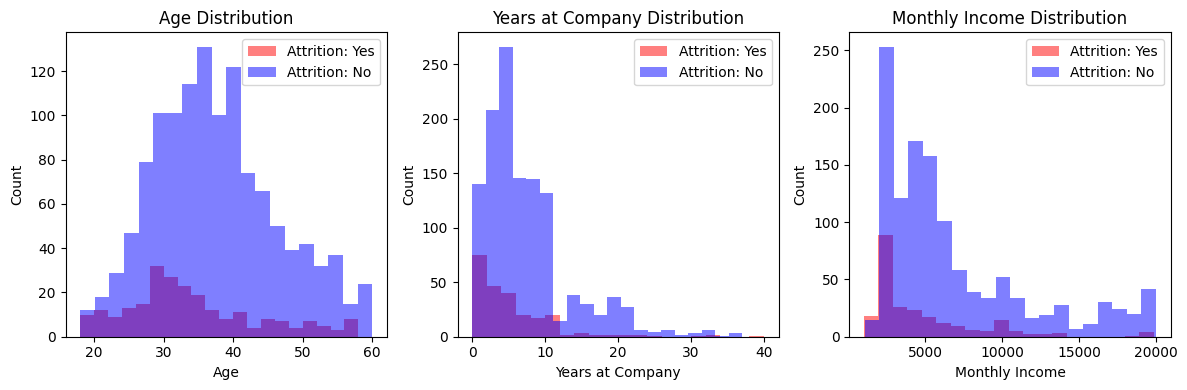

In [46]:
#Explore the relationship between attrition and factors like age, years at the company, and income
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)

plt.hist(dataset[dataset['Attrition'] == 'Yes']['Age'], bins=20, color='red', alpha=0.5, label='Attrition: Yes')
plt.hist(dataset[dataset['Attrition'] == 'No']['Age'], bins=20, color='blue', alpha=0.5, label='Attrition: No')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.legend()

plt.subplot(1, 3, 2)

plt.hist(dataset[dataset['Attrition'] == 'Yes']['YearsAtCompany'], bins=20, color='red', alpha=0.5, label='Attrition: Yes')
plt.hist(dataset[dataset['Attrition'] == 'No']['YearsAtCompany'], bins=20, color='blue', alpha=0.5, label='Attrition: No')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.title('Years at Company Distribution')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(dataset[dataset['Attrition'] == 'Yes']['MonthlyIncome'], bins=20, color='red', alpha=0.5, label='Attrition: Yes')
plt.hist(dataset[dataset['Attrition'] == 'No']['MonthlyIncome'], bins=20, color='blue', alpha=0.5, label='Attrition: No')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.title('Monthly Income Distribution')
plt.legend()

plt.tight_layout()
plt.show()

# Employee Attrition Prediction Model

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Attrition'] = le.fit_transform(data['Attrition'])
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Gender'] = le.fit_transform(data['Gender'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['Over18'] = le.fit_transform(data['Over18'])
data['OverTime'] = le.fit_transform(data['OverTime'])

In [48]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [49]:
#correlation:
correlation = data.corr()

print(correlation["Attrition"].sort_values(ascending=False))

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

In [50]:
#I will add a new feature to this data known as the satisfaction score:

data['SatisfactionScore'] = data['EnvironmentSatisfaction'] + data['JobSatisfaction'] + data['RelationshipSatisfaction']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(xtrain, ytrain)

# Evaluate the model's performance
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", round(accuracy*100,2),'%')

Accuracy: 86.17 %
